<h1><b>Objective:</b></h1>
<h4>The objective of this data analysis project is to gain insights into the ecommerce order
data of a fictional company. We will analyze customer information, product details, and
order history to derive meaningful conclusions that can aid business decision-making.</h4>


In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
connection = mysql.connector.connect(
user='root',
password='Admin@123',
host='localhost',
database='ecommerce'
)


In [6]:
cursor = connection.cursor()

In [7]:
# Load data into Pandas DataFrames
cursor.execute("select * from product")
prod_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from order_details")
order_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from customer")
cust_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.close()
connection.close()

In [8]:
prod_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [10]:
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [11]:
cust_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


<h1><b>Data Cleaning:</b></h1><h4>
Before proceeding with the analysis, let's perform some basic data cleaning:</h4>:

In [12]:
prod_df.shape

(61, 7)

In [13]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [14]:
prod_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


In [15]:
prod_df.describe(include=object).T

,count,unique,top,freq
product_id,61,61,P102,1
product_name,61,43,Tablet,4
category,61,4,Electronics,32
sub_category,61,22,Electronics,20


In [12]:
prod_df.isnull().value_counts()

product_id  product_name  category  sub_category  original_price  selling_price  stock
False       False         False     False         False           False          False    61
Name: count, dtype: int64

In [13]:
prod_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64

In [14]:
missing_values = prod_df.isnull().sum()
print(missing_values)

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64


In [15]:
print(prod_df.dtypes)

product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object


In [69]:
cust_df.shape

(62, 7)

In [70]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [71]:
cust_df.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


In [72]:
cust_df.describe(include=object).T

,count,unique,top,freq
customer_id,62,62,C1001,1
name,62,39,Ava,4
city,62,4,Tokyo,22
email,62,52,henry@gmail.com,3
phone_no,62,26,1234567890,11
address,62,57,oo.pp.road,2


In [73]:
cust_df.isnull().value_counts()

customer_id  name   city   email  phone_no  address  pin_code
False        False  False  False  False     False    False       62
Name: count, dtype: int64

In [75]:
missing_values = cust_df.isnull().sum()
print(missing_values)

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64


In [76]:
cust_df['name'].value_counts()

name
Ava          4
Henry        3
Sophia       3
Mia          3
Oliver       3
Ethan        3
James        2
Harper       2
Lucas        2
Aria         2
Olivia       2
Alexander    2
Evelyn       2
William      2
Emma         2
Liam         2
Chloe        1
Noah         1
Aiden        1
Logan        1
Sofia        1
Carter       1
Elena        1
Luna         1
Elijah       1
Avery        1
Steve        1
Scarlett     1
Benjamin     1
Michael      1
john         1
Lucy         1
Leo          1
lilly        1
Wyatt        1
Jack         1
Jackson      1
Peter        1
Isabella     1
Name: count, dtype: int64

In [77]:
order_df.shape

(76, 11)

In [78]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
 8   TotalRevenue  76 non-null     float64       
 9   Month         76 non-null     object        
 10  MonthYear     76 non-null     period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(5), period[M](1)
memory usage: 6.7+ KB


In [79]:
order_df.describe()

,order_id,quantity,total_price,order_date,TotalRevenue
count,76.000000,76.000000,76.000000,76,76.000000
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016,30057.894737
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00,450.000000
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00,7625.000000
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00,20000.000000
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00,40000.000000
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00,180000.000000
std,28.673660,0.558664,18442.574791,NaN,32332.109997


In [80]:
order_df.describe(include=object).T

,count,unique,top,freq
customer_id,76,59,C1013,3
product_id,76,58,P102,3
payment_mode,76,2,Online,43
order_status,76,6,Delivered,27
Month,76,5,March,21


In [81]:
order_df.isnull().value_counts()

order_id  customer_id  product_id  quantity  total_price  payment_mode  order_date  order_status  TotalRevenue  Month  MonthYear
False     False        False       False     False        False         False       False         False         False  False        76
Name: count, dtype: int64

In [82]:
order_df['order_status'].value_counts()

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64

In [83]:
missing_values = order_df.isnull().sum()
print(missing_values)

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
TotalRevenue    0
Month           0
MonthYear       0
dtype: int64


<h1><b>Exploratory Data Analysis (EDA) and Visualization:</b></h1>
<h2>Customer Analysis:</h2>
<h4> Identify the total number of customers City wise.</h4>

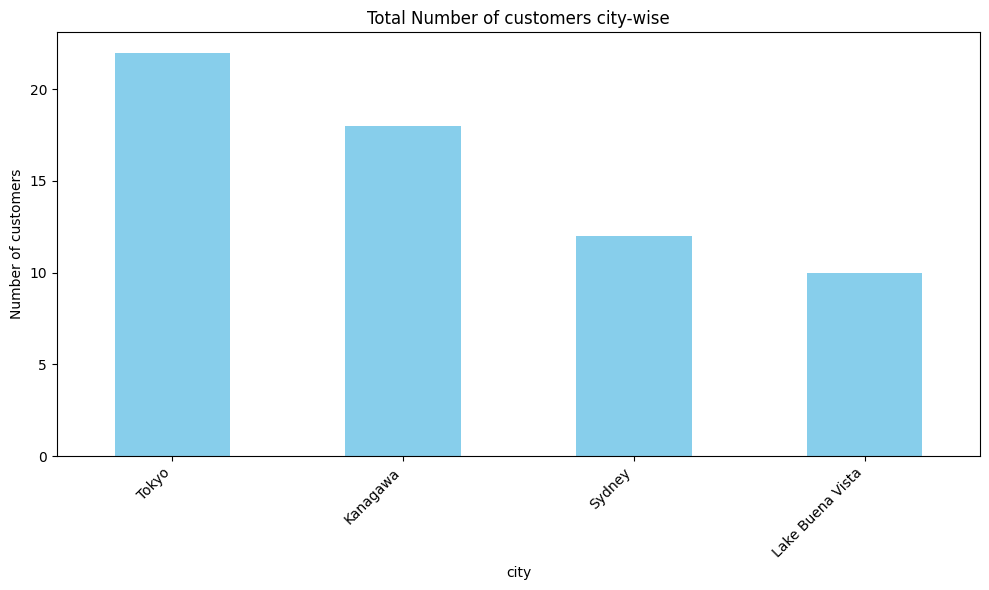

In [16]:
# Count the number of customers city-wise
customer_count_by_city = cust_df['city'].value_counts()
# Create a bar graph
plt.figure(figsize=(10, 6))
customer_count_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Number of customers city-wise')
plt.xlabel('city')
plt.ylabel('Number of customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
# Display the bar graph
plt.show()

<h4><b>Inference :</b></h>
Tokyo is the highest number of customers and Lake Buena Vista is the lowest number of customer.

<h4>Identify the most frequent customers based on their order history</h4>

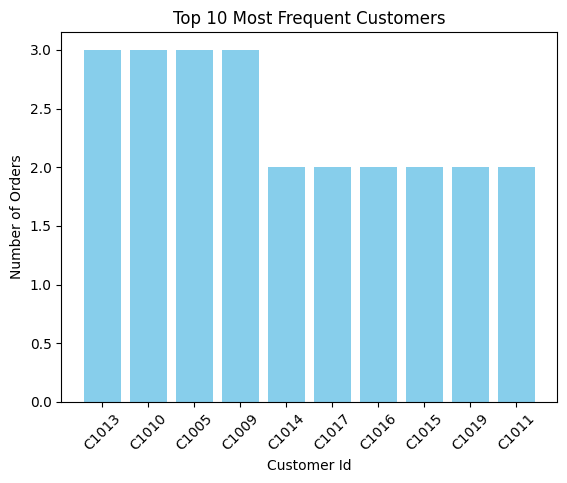

In [17]:
customer_counts = order_df['customer_id'].value_counts()
customer_counts = customer_counts.sort_values(ascending=False)
top_n = 10  # Change this value to select the desired number of top customers
top_customers = customer_counts[:top_n]
plt.bar(top_customers.index, top_customers.values,color='skyblue')
plt.xlabel('Customer Id')
plt.ylabel('Number of Orders')
plt.title('Top {} Most Frequent Customers'.format(top_n))
plt.xticks(rotation=45)
plt.show()

<h3><b>Inference :</b></h3>
Within Top 10 most frequent customers id's are c1013,c1010,c1005,c1009,c1014,c1017,c1016,c1015,c1019,c1011.

<h2>Product Analysis:</h2>
<h4>Determine the total number of products available by category</h4>

category
Appliance      20
Electronics    32
Furniture       8
furniture       1
Name: product_id, dtype: int64


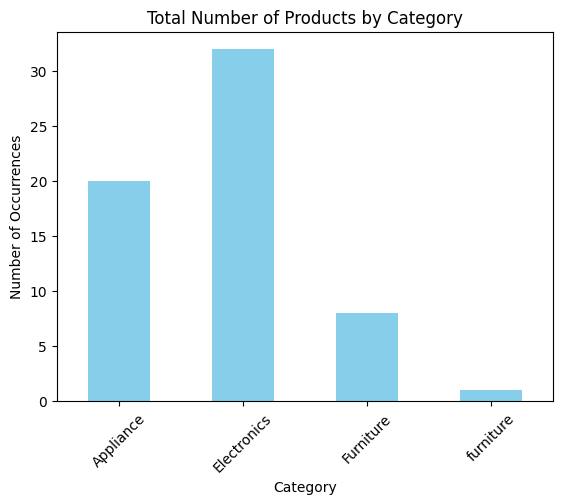

In [19]:

category_counts = prod_df.groupby('category')['product_id'].count()
print(category_counts)
category_counts.plot(kind='bar',color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.title('Total Number of Products by Category')
plt.xticks(rotation=45)
plt.show()


<h3><b>Inference :</b></h3>
Highest number of occurrences of catagory is Electronics and then Appliance and lowest is furniture.

<h4> Analyze the distribution of products across sub-categories.</h4>

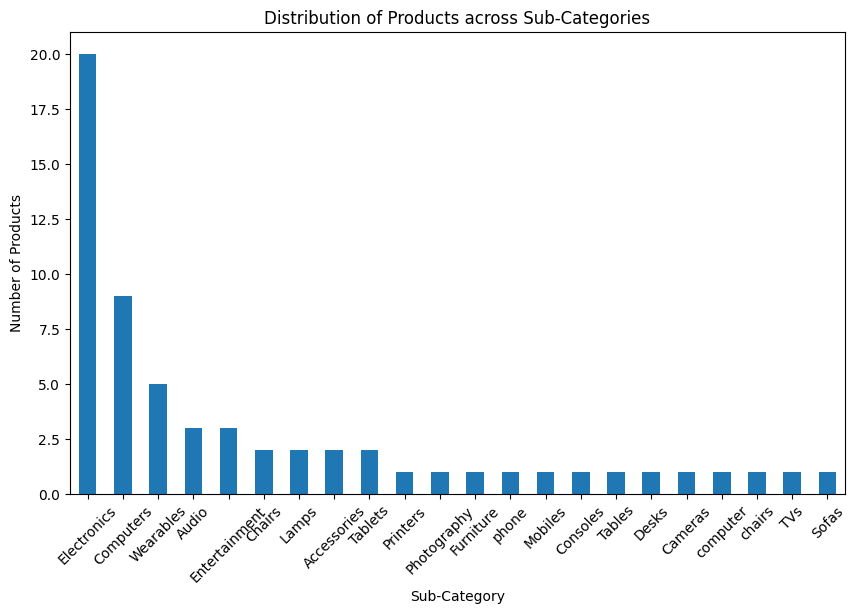

In [21]:
sub_category_counts = prod_df['sub_category'].value_counts()
sub_category_counts = sub_category_counts.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sub_category_counts.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Products across Sub-Categories')
plt.xticks(rotation=45)
plt.show()

<h3><b>Inference :</b></h3>
Highest distribution of product across sub-category is Electrocnics and lowest are Printers to Sofas.

<h4><b>Identify products with low stock levels</b></h4>

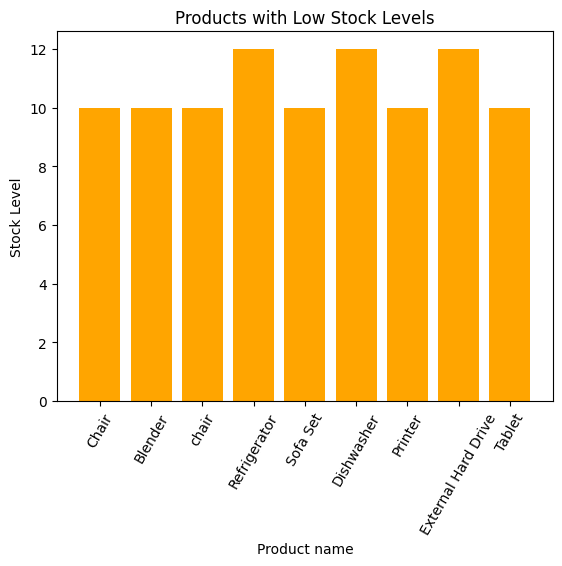

In [26]:
low_stock_threshold = 15

# Filter products with low stock levels
low_stock_products = prod_df[prod_df['stock'] < low_stock_threshold]

# Draw a bar chart
plt.bar( low_stock_products['product_name'], low_stock_products['stock'], color='orange')

# Adding labels and title
plt.xlabel('Product name')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=60)
# Show the plot
plt.show()

<h3><b>Inference :</b></h3>
Lowest stock level Refrigerator and Dishwasher and Extenal Hard Drive and so on

<h4><b>Calculate the average, maximum, and minimum selling prices for products</b></h4>


17774.62262295082 70000.0 450.0


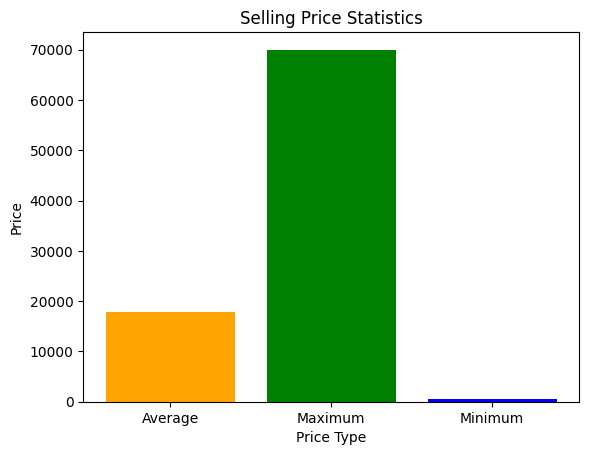

In [28]:
average_price = prod_df['selling_price'].mean()
maximum_price = prod_df['selling_price'].max()
minimum_price = prod_df['selling_price'].min()
print(average_price, maximum_price, minimum_price)
data = {'Average':average_price, 'Maximum': maximum_price, 'Minimum': minimum_price}
plt.bar(data.keys(), data.values(),color=['orange','green','blue'])
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Selling Price Statistics')
plt.show()

<h3><b>Inference :</b></h3>
Maximum Selling price for product is high, Average selling price for product is medium and minimum selling price for product is low.

<h2>Order Analysis</h2>
<h4>Calculate the top 10 orders product wise</h4>

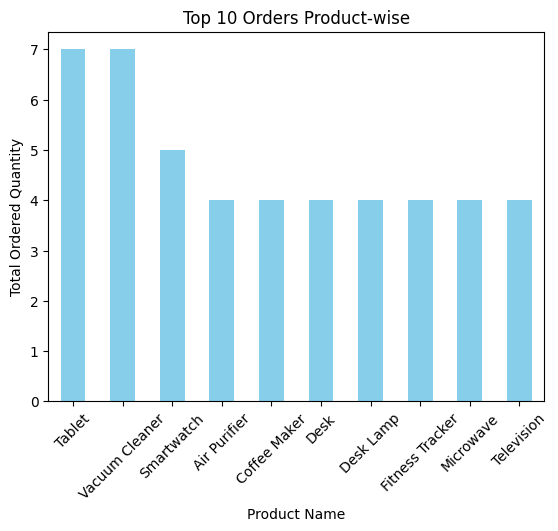

In [32]:
result_df = pd.merge(order_df, prod_df, on='product_id', how='inner')

# Calculate the top 10 orders product-wise
top_orders = result_df.groupby('product_name')['quantity'].sum().nlargest(10)

# Draw a bar chart
top_orders.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Ordered Quantity')
plt.title('Top 10 Orders Product-wise')
plt.xticks(rotation=45)
# Show the plot
plt.show()

<h3><b>Inference :</b></h3>
Total highest order product is Tablet and 10th position product is Television.

<h4>Analyze the order status distribution</h4>

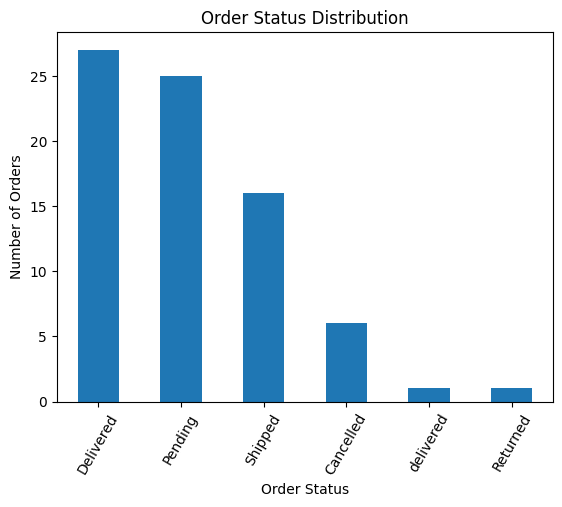

In [33]:
order_status_counts = order_df['order_status'].value_counts()

# Creating the bar chart
order_status_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h3><b>Inference :</b></h3>

<h4>according to order status highest distributed product is Delivered and lowest is Returned product.
</h4>

<h3>Identify the most popular products based on order quantity
</h3>

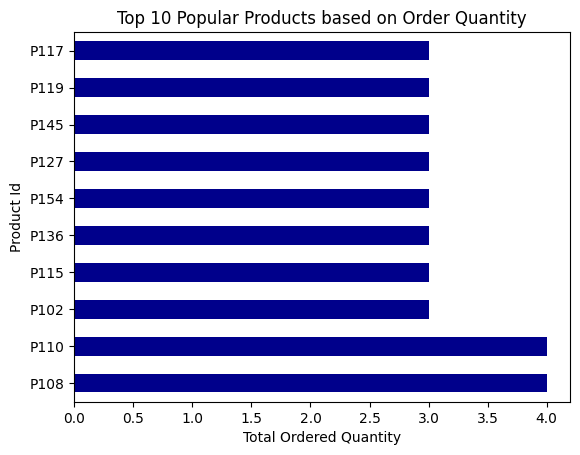

In [34]:
product_quantities = order_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False)

# Selecting the top N products (change N to the desired number)
top_n = 10
top_products = product_quantities.head(top_n)

# Creating the horizontal bar chart
top_products.plot(kind='barh',color='darkblue')

# Adding labels and title
plt.xlabel('Total Ordered Quantity')
plt.ylabel('Product Id')
plt.title('Top {} Popular Products based on Order Quantity'.format(top_n))

# Display the chart
plt.show()

<h3><b>Inference</b></h3>
hihgest order quantity is p110 ad p108 then lowest p102,p115 etc.



<h2><b>Sales Analysis</b></h2>
<h4>Calculate total revenue generated from orders product wise
</h4>

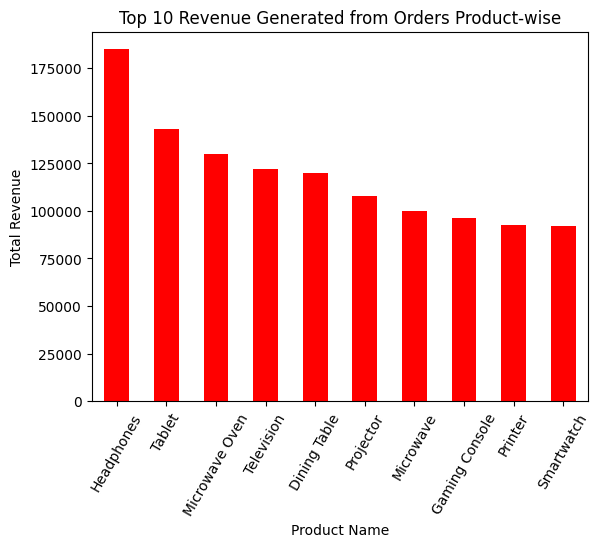

In [35]:
prod_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']
product_revenue = prod_df.groupby('product_name')['TotalRevenue'].sum().sort_values(ascending=False)
top_n = 10
product_revenue = product_revenue.head(top_n)

# Creating the bar chart
product_revenue.plot(kind='bar',color='red')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Revenue Generated from Orders Product-wise')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h3><b>Inference :</b></h3>
According to the revenue Headphones is the highest revenue and Smartwatch is the lowest revenue.



<h4>Calculate total revenue product category wise percentage
</h4>

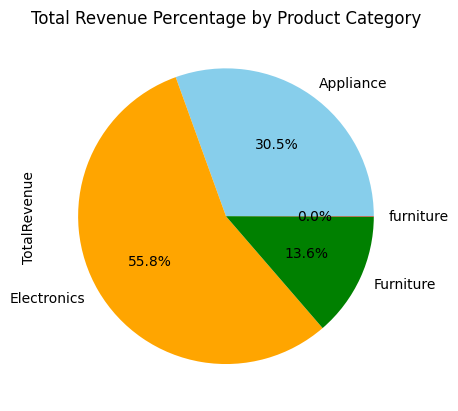

In [38]:
prod_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']
category_revenue = prod_df.groupby('category')['TotalRevenue'].sum()

# Calculate the percentage of total revenue for each category
total_revenue = prod_df['TotalRevenue'].sum()
category_percentage = (category_revenue / total_revenue) * 100

# Creating the pie chart
category_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green','red'])

# Adding title
plt.title('Total Revenue Percentage by Product Category')

# Display the chart
plt.show()

<h3><b>Inference :</b></h3>
Electronics total revenue is highest 55.8% and lowest revenue is 13.7%


<h4>Calculate the total revenue generated from all orders</h4>


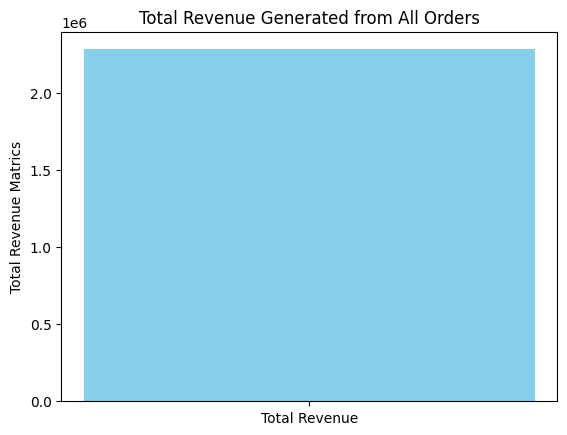

In [39]:
order_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']

# Calculate the total revenue
total_revenue = order_df['TotalRevenue'].sum()
print()
# Creating a bar chart for total revenue
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')

# Adding labels and title
plt.ylabel('Total Revenue Matrics')
plt.title('Total Revenue Generated from All Orders')

# Display the chart
plt.show()

<h3><b>Inference :</b></h3>
total revenue for all orfers is 2284400.0



<h4>Identify the most profitable products based on the difference between original and selling prices</h4>

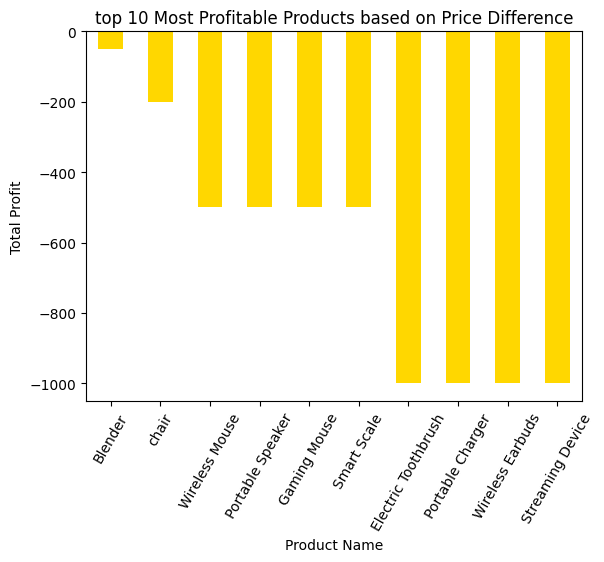

In [40]:
prod_df['Profit'] =prod_df['selling_price'] - prod_df['original_price']
product_profit = prod_df.groupby('product_name')['Profit'].sum().sort_values(ascending=False)

top_n = 10
product_profit = product_profit.head(top_n)
# Creating the bar chart
product_profit.plot(kind='bar', color='gold')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.title('top 10 Most Profitable Products based on Price Difference')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h3><b>Inference :</b></h3>
Streaming Device is the hig selling price and Blender is the lowest selling price.



<h2><b>Customer Order Patterns:</b></h2>

<h4>Identify product names with the highest and lowest order quantities
</h4>

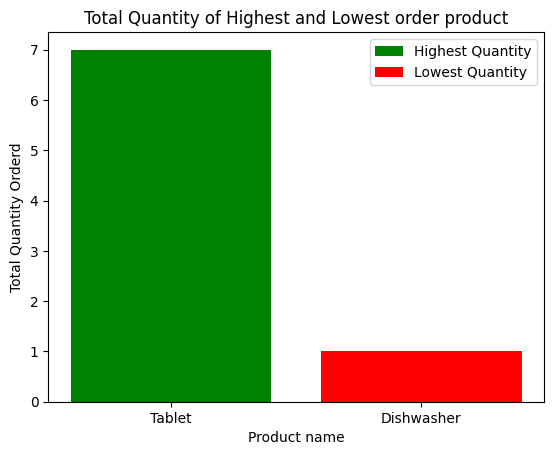

In [45]:
result_df = pd.merge(order_df, prod_df, on='product_id', how='inner')

product_quantities = result_df.groupby('product_name')['quantity'].sum()

# Find the product with the highest order quantity
max_quantity_product = product_quantities.idxmax()

# Find the product with the lowest order quantity
min_quantity_product = product_quantities.idxmin()

# Creating the bar chart
#product_quantities.plot(kind='bar', color='skyblue')

# Highlighting the highest and lowest order quantities
plt.bar(max_quantity_product, product_quantities[max_quantity_product], color='green', label='Highest Quantity')
plt.bar(min_quantity_product, product_quantities[min_quantity_product], color='red', label='Lowest Quantity')

# Adding labels and title
plt.xlabel('Product name')
plt.ylabel('Total Quantity Orderd')
plt.title('Total Quantity of Highest and Lowest order product')

# Adding legend
plt.legend()

<h3><b>Inference :</b></h3>
highest order product is Tablet and Dishwasher is the lowest .



<h4>Identify customers with the highest and lowest order quantities by customer name
</h4>

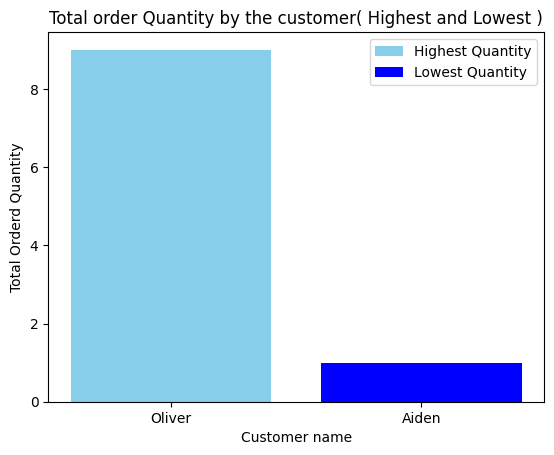

In [46]:
result_df = pd.merge(order_df, cust_df, on='customer_id', how='inner')

product_quantities = result_df.groupby('name')['quantity'].sum()

# Find the product with the highest order quantity
max_quantity_product = product_quantities.idxmax()

# Find the product with the lowest order quantity
min_quantity_product = product_quantities.idxmin()

# Creating the bar chart
#product_quantities.plot(kind='bar', color='skyblue')

# Highlighting the highest and lowest order quantities
plt.bar(max_quantity_product, product_quantities[max_quantity_product], color='skyblue', label='Highest Quantity')
plt.bar(min_quantity_product, product_quantities[min_quantity_product], color='blue', label='Lowest Quantity')

# Adding labels and title
plt.xlabel('Customer name')
plt.ylabel('Total Orderd Quantity')
plt.title('Total order Quantity by the customer( Highest and Lowest )')

# Adding legend
plt.legend()

<h3><b>Inference :</b></h3>
Oliver orderd highest quantity and Aiden is the lowest



<h4>Determine the most preferred payment modes.
</h4>

payment_mode
Online    43
COD       33
Name: count, dtype: int64


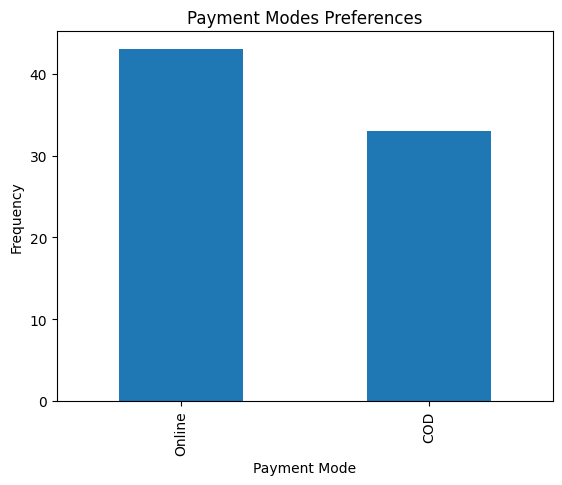

In [47]:
payment_modes_counts = order_df['payment_mode'].value_counts()
print(payment_modes_counts)
# Creating the bar chart
payment_modes_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.title('Payment Modes Preferences')
plt.show()

<h3><b>Inference</b></h3>
customers are very preferred payment on online mode rather than COD.



<h2><b>Time-based Analysis:</b></h2>
<h3>Month wise total sales.
</h3>

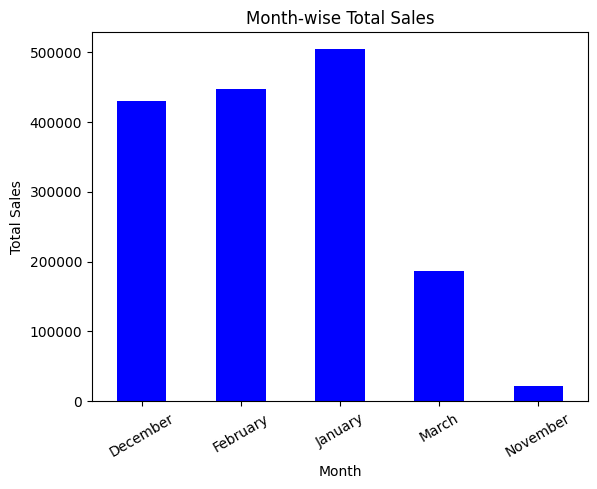

In [52]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])  # Convert 'OrderDate' to datetime format
order_df['Month'] = order_df['order_date'].dt.month_name()  # Extract month names from 'OrderDate'

# Group by month and calculate total sales
monthly_sales = order_df.groupby('Month')['total_price'].sum()

# Creating the bar chart
monthly_sales.plot(kind='bar', color='blue')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=30)
# Display the chart
plt.show()

<h3><b>Inference :</b></h3>
In month of January was highest sales, and in November was lowest.



<h4>Month and year wise total sales
</h4>

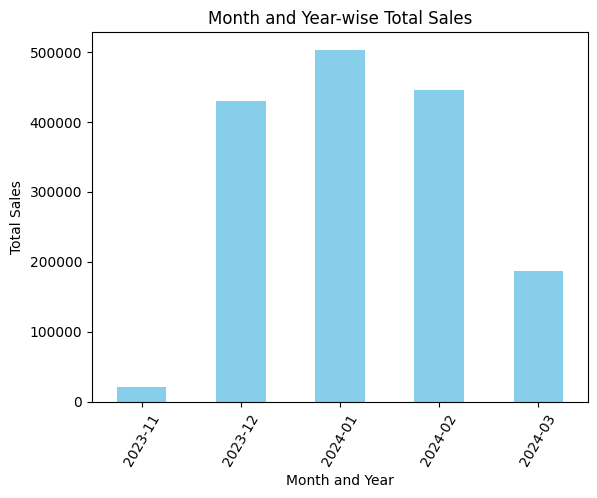

In [53]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])  # Convert 'OrderDate' to datetime format
order_df['MonthYear'] = order_df['order_date'].dt.to_period('M')  # Extract month and year as a Period object

# Group by month and year and calculate total sales
monthly_sales = order_df.groupby('MonthYear')['total_price'].sum()

# Creating the bar chart
monthly_sales.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=60)
# Display the chart
plt.show()

<h3><b>Inference :</b></h3>
in 2024 january was the highest sales and 2023-November was lowest.



<h4>Identify peak order date
</h4>

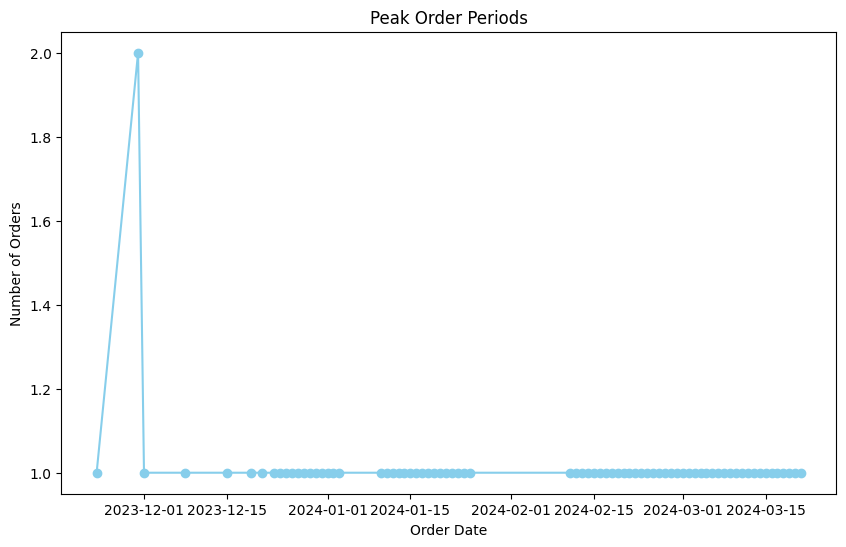

In [64]:
# Convert 'order_date' column to datetime format
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Calculate the daily order count
daily_orders = order_df.groupby('order_date').size().reset_index(name='order_count')

# Sort the DataFrame by order date
daily_orders = daily_orders.sort_values(by='order_date')

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_orders['order_date'], daily_orders['order_count'], color='skyblue', marker='o', linestyle='-')
plt.title('Peak Order Periods')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.show()

<h3><b>Inference :</b></h3>
Identify patterns, trends, or seasonality in the daily order counts. Observe peak periods or periods of increased order activity.


<h2><b>Geographical Analysis:</b></h2>

<h3>Explore the distribution of customers across different cities

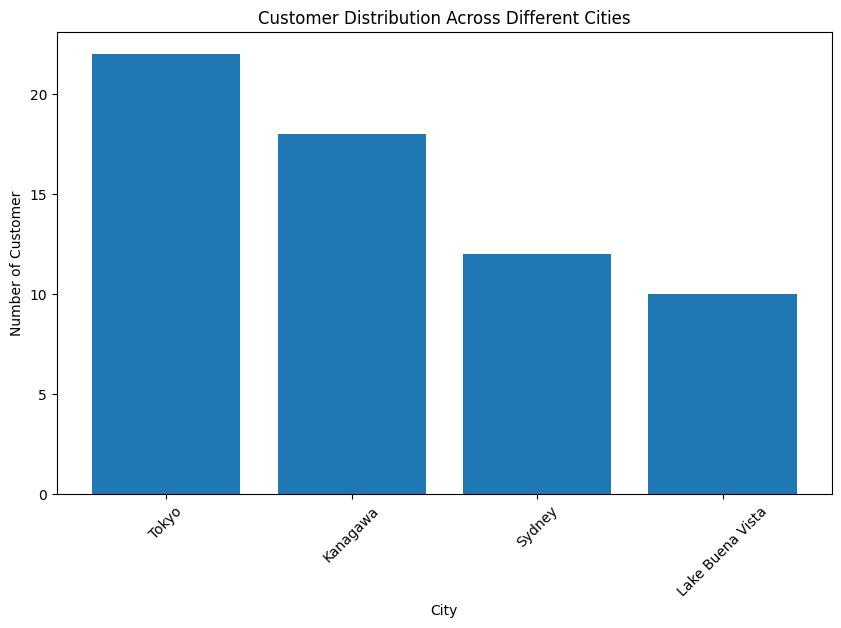

In [65]:
# Calculate the count of customers in each city
customer_city_distribution = cust_df['city'].value_counts().reset_index()

# Rename columns for better readability
customer_city_distribution.columns = ['City', 'Customer Count']

# Sort the DataFrame by customer count in descending order
sorted_customer_city_distribution = customer_city_distribution.sort_values(by='Customer Count', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_customer_city_distribution['City'], sorted_customer_city_distribution['Customer Count'])
plt.title('Customer Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

<h3><b>Inference: </b></h3>
Identify cities with the highest and lowest customer counts. Understand the overall distribution of customers across different citie .So here Tokyo is the highest and Lake Buena Vista is lowest.s.


<h4>Analyze whether certain products or categories are more popular in a specific city</h4>

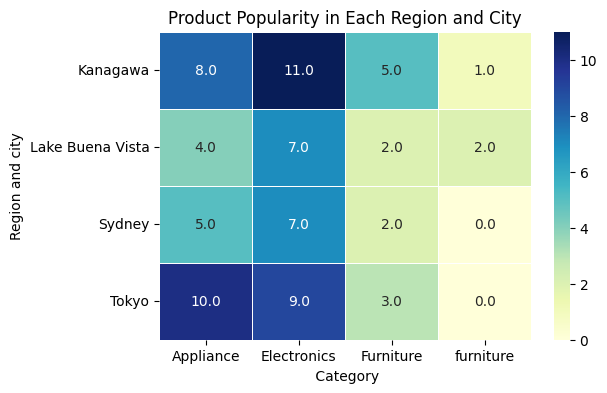

In [58]:
# Merge orders, products, and customers tables
merged_data = pd.merge(order_df, prod_df, on='product_id', how='inner')
merged_data = pd.merge(merged_data, cust_df, on='customer_id', how='inner')

# Calculate the total quantity sold for each product category in the selected city
category_quantity_pivot = merged_data.groupby(['city','category']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(category_quantity_pivot, cmap='YlGnBu', annot=True, fmt='', linewidths=.5)
plt.title(f'Product Popularity in Each Region and City')
plt.xlabel(' Category')
plt.ylabel('Region and city')
plt.show()


<h2><b>Product Performance:</b></h2>
<h4>Identify the best-selling products
</h4>

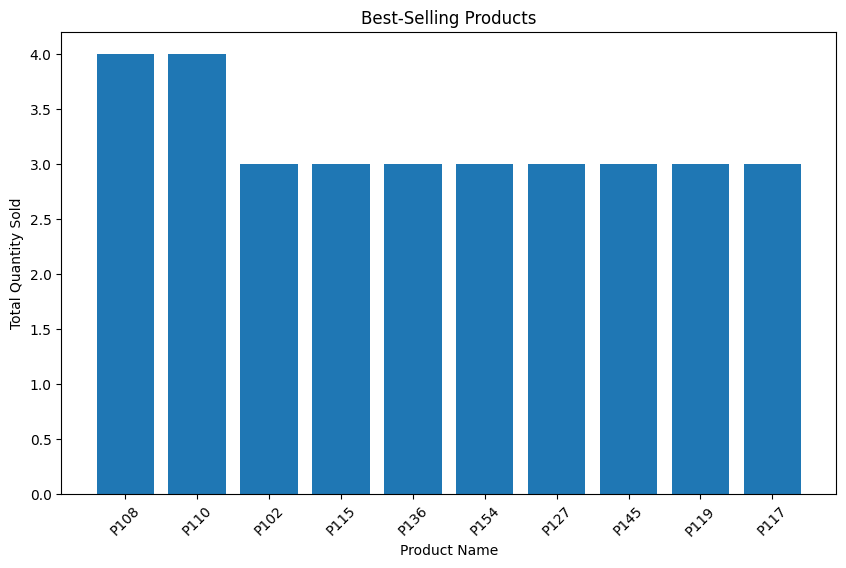

In [66]:
# Calculate the total quantity ordered for each product
product_quantity_totals = order_df.groupby('product_id')['quantity'].sum().reset_index()

# Sort the DataFrame by quantity in descending order
sorted_product_quantities = product_quantity_totals.sort_values(by='quantity', ascending=False)

# Take the top 10 products for the bar chart
top_10_products = sorted_product_quantities.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_id'], top_10_products['quantity'])
plt.title('Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()


<h3><b>Inference: </b></h3>
Identify the top-performing products based on total quantity sold. Understand which products contribute significantly to overall sales.




<h4>Identify top 10 slow-moving products based on low sales
</h4>

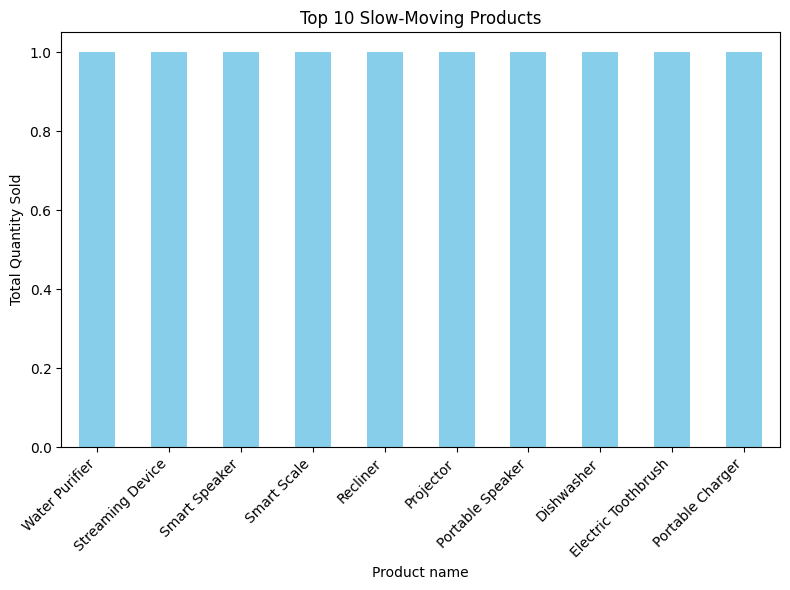

In [62]:
result_df = pd.merge(order_df, prod_df, on='product_id', how='inner')

low_selling_products = result_df.groupby('product_name')['quantity'].sum().sort_values(ascending=True)

# Select the top 10 slow-moving products
top_slow_products = low_selling_products.head(10)

# Creating the bar chart
plt.figure(figsize=(6,4))
top_slow_products.plot(kind='bar', color='skyblue',figsize=(8,6))

# Adding labels and title
plt.xlabel('Product name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Slow-Moving Products')

# Display the chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3><b>Inference: </b></h3>
top 10 slow moving products are water purifire streaming device etc.



<h2><b>Payment Analysis:</b></h2>
<h3>Display successful and pending payments order counts</h3>

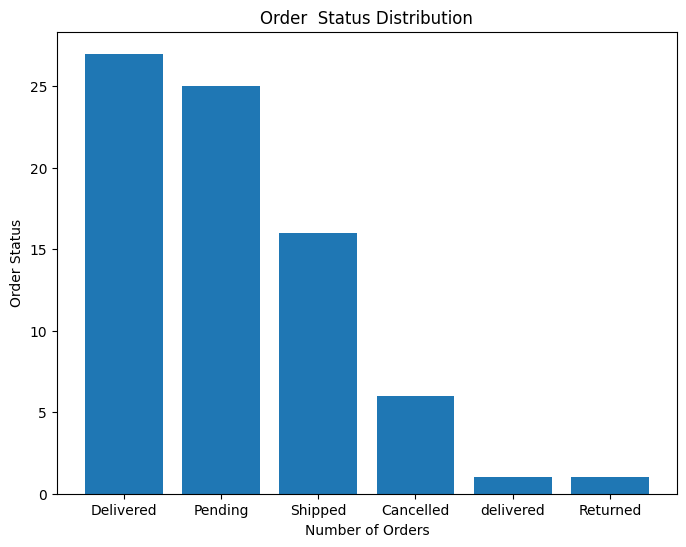

In [84]:
# Calculate the order counts for successful and pending payments
payment_status_counts = order_df['order_status'].value_counts().reset_index()

# Rename columns for better readability
payment_status_counts.columns = ['order_status', 'Order Count']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(payment_status_counts['order_status'], payment_status_counts['Order Count'])
plt.title('Order  Status Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Order Status')
plt.grid(False)
plt.show()


<h3><b>Inference: </b></h3>
Identify the proportion of successful and pending orders in the dataset. Assess the balance or potential issues related to order statuses.


<h3><b>Conclusion:</b></h3>
After cleaning and visualizing the data, we have conclusions such as 
According to the revenue Headphones is the highest revenue and Smartwatch is the lowest revenue.
dles.